Checkpoint
Fluid property relationship coefficients loaded
Fluid property relationships loaded
Libraries loaded
folder already exists
mass flow inlet
Number of spaces, N 20
Inputs defined

Setting Up and Initializing . . .
283.0
Setup and Initialization Complete

Setup Description:
Filename: Lab-Design-Test
CFL Number: 500.00 
Average Time Step Size: 5.45 s
Maximum Solution Time: 1000.00 hr
Ergun EQ Pressure Loss: 51.8 Pa or 0.208 in. w.g.
Koekemoer EQ Pressure Loss: 80.4 Pa or 0.323 in. w.g.

Solving . . .
	 0.0 inlet period complete
	 1.0 inlet period complete
	 2.0 inlet period complete
	 3.0 inlet period complete
	 4.0 inlet period complete
	 periodicity temperature evolution achieved
Solving Complete. 
Final solution time: 0.37 hr
Elapsed time: 1.251697 seconds.

Post Processing . . .
Writing CSV Files...
CSV Files Complete
Plotting...
Plots Complete
Post Processing Complete
END 0


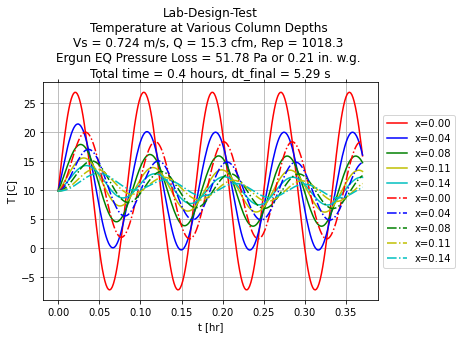

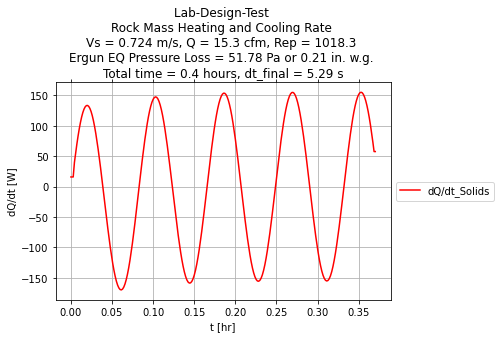

Nuvol [33.50794089381436, 33.386872664894724, 74.01476673694923]


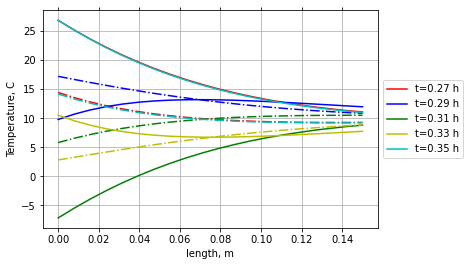

	 velocity = 0.76795 m/s
	 delta_ps = 51.99670 Pa
Energy balance 16.80298066526304 -127.23324193486042 -153.2774273186039
	 mass flow rate = 0.00900 kg/s
	 particle Reynolds number = 972.9
	 Tf.out = 284.13245 K, Ts.out= 282.35718 K


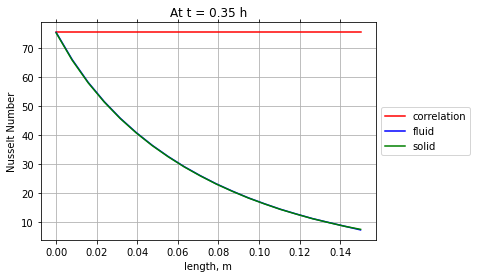

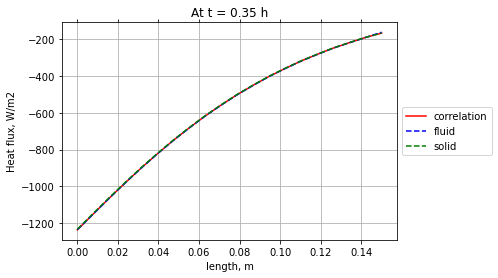

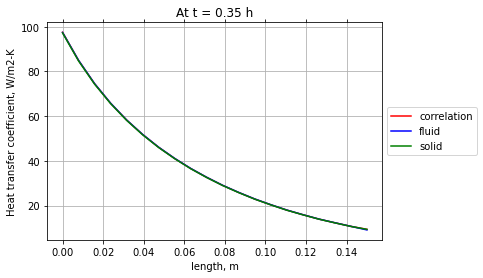

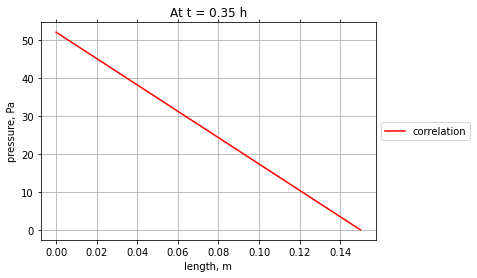

saved to C:\Users\pgareau\source\repos\mirarcosoftware\NHEET1D\NHEET-1D-model\Solutions\it0/

Ts poly fit [ 0.94205547 -0.01150528  0.02603393] 0.9892101519916712
Ts myfn fit [0.01639881 3.35211583 0.94120755] 0.9998506962790912
q not saved line335


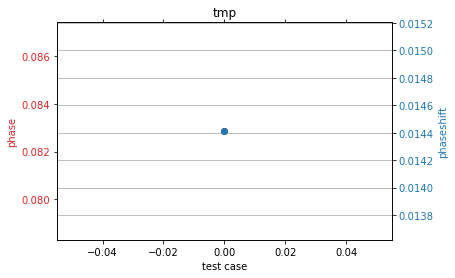

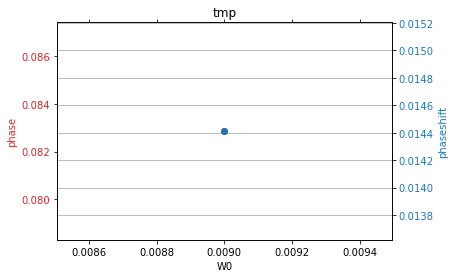

parametric study complete


()

In [1]:
import numpy as np
from NHEET_main_looper import NHEET_main

#### Constant inputs
fileName = 'Lab-Design-Test'
inlet_bc_type=2 #0=V,1=Qcfm,2=W0 (kg/s)    
T_inlet_method = 1 #Choose Between Two Methods: 1 = User-Defined Function, 2 = Input CSV Table
T0 = 283.0 #[K] 
dTampin = 17. #[K] inlet temperature profile amplitude
dlamdain = 1./12. #inlet temperature profile period (x3600s)
Nu_method=1 #method 1=, 2=Allen2015, 3=Beek1962
CFLin = 500 #approximate CFL number at time=0
Ndt=30 #approximate number of timesteps per period
first_time_step_size = 10.
Enhanced_Schumann = 0 #0=Schumann, 1=Enhanced Schmann
time_integrator = 2 #1=Backward Euler, 2=Crank Nicholson
rhos = 2700. #kg/m^3
cps = 900. #J/kg-K
ks = 3. #W/m-K

const_input_vals=[fileName,inlet_bc_type,T_inlet_method,T0,dTampin,dlamdain,Nu_method,CFLin,Ndt,first_time_step_size, \
                  Enhanced_Schumann,time_integrator,rhos,cps,ks]
    
# # ##Patrick's values
# inlet_bc_type=1 #0=V,1=Qcfm,2=W0 (kg/s)
# T_inlet_method = 2 #Choose Between Two Methods: 1 = User-Defined Function, 2 = Input CSV Table
# const_input_vals=[fileName,inlet_bc_type,T_inlet_method,293.15,10.,24.,1,2000,30,120,0,1,2635,790,2.6]

#### Variable inputs (brackets matter)
inlet_bcs=[0.009] #V,Qcfm,W0. Set inlet_bc_type 
#inlet_bcs=[0.001,0.003,0.006,0.009,0.012,0.015,0.018]
Ds=[0.1]#container width
Lfacs = [1.5] #container cylinder height factor, L=Lfac*D
Dps =[0.02] #spherical equivalent particle diameter, m
delDps =[0.] #distribution spread, not used
#phis = [0.88] #sphericity
phis = [1.]
Dpcorrs=[1.] #particle diameter correction. ie if want d32 in Ergun's, not used
epss = [0.455] #void fraction #uniform spheres
#epss = [0.382] #void fraction #spheres distribution
#epss = [0.396] #void fraction #rocks distribution
#epss=[0.25,0.3,0.35,0.4,0.45,0.5]

# inlet_bcs=[0.003,0.009,0.018]
# epss=[0.3,0.4,0.5]

# #Patrick's values
# inlet_bcs=[525.]
# Ds=[14*.3048]
# Lfacs=[8./14.]
# Dps=[0.02]
# epss=[0.3] 

var_inputs = np.array([inlet_bcs,Ds,Lfacs,Dps,delDps,phis,Dpcorrs,epss])

NHEET_main(const_input_vals,var_inputs)